📦 **Step 1: Import Libraries**  
Importing essential libraries for data processing, model training, and evaluation:
- `numpy` for numerical operations  
- `matplotlib` for plotting  
- `sklearn` for data generation, splitting, scaling, and performance metrics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

🏗️ **Step 2: Define Logistic Regression Model**

This class implements **Logistic Regression from scratch** using NumPy with support for:

- ✅ Batch Gradient Descent  
- 🔄 Stochastic Gradient Descent (SGD)  
- 🔀 Mini-Batch Gradient Descent  

It includes:
- Weight & bias initialization  
- Sigmoid activation and binary cross-entropy loss  
- Gradient computation  
- Training loops with loss tracking and progress printing  
- Methods to predict probabilities and binary labels

In [ ]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.losses = []

    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, n_features):
        """Initialize weights and bias"""
        self.weights = np.zeros(n_features)
        self.bias = 0

    def compute_loss(self, X, y):
        """Compute binary cross-entropy loss"""
        m = X.shape[0]    # m = rows
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)

        # Avoid numerical instability
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon) # Clips values: ensures y_pred is in the range [1e-15, 1 - 1e-15].

        loss = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    def predict_proba(self, X):
        """Predict probabilities""" # computes linear combination (z = X·w + b),  passes it --> sigmoid function to squash the result into the range [0, 1]
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        """Predict class labels"""
        return (self.predict_proba(X) >= threshold).astype(int)

    def compute_gradients(self, X, y):
        """Compute gradients for weights and bias""" #Calculates how much we should adjust the weights (dw) and bias (db) to reduce the loss + partial derivatives
        m = X.shape[0]
        y_pred = self.predict_proba(X)

        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        return dw, db

    def gradient_descent(self, X, y, learning_rate=0.5, epochs=600, verbose=True):
        """Standard Gradient Descent optimizer"""
        m, n = X.shape
        self.initialize_parameters(n)
        self.losses = []

        for epoch in range(epochs):
            # Compute gradients using the entire dataset
            dw, db = self.compute_gradients(X, y)

            # Update parameters
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

            # Compute and store loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)

            # Print progress
            if verbose and (epoch % 100 == 0 or epoch == epochs - 1): # verbose is a boolean flag lets user control whether to print updates during training.
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        return self

    def batch_gradient_descent(self, X, y, learning_rate=0.5, epochs=600, verbose=True):
        """Batch Gradient Descent optimizer (same as standard GD)"""
        # This is essentially the same as gradient_descent
        return self.gradient_descent(X, y, learning_rate, epochs, verbose)

    def stochastic_gradient_descent(self, X, y, learning_rate=0.2, epochs=880, verbose=True):
        """Stochastic Gradient Descent optimizer"""
        m, n = X.shape
        self.initialize_parameters(n)
        self.losses = []

        for epoch in range(epochs):
            # Create a list to store loss for each sample in this epoch
            epoch_losses = []

            # Shuffle the data
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(m):
                # Get a single sample
                x_i = X_shuffled[i:i+1]
                y_i = y_shuffled[i:i+1]

                # Compute gradients using a single sample
                dw, db = self.compute_gradients(x_i, y_i)

                # Update parameters
                self.weights -= learning_rate * dw
                self.bias -= learning_rate * db

                # Calculate loss for the entire dataset to track progress
                if i % (m // 10) == 0:  # Calculate loss a few times per epoch
                    loss = self.compute_loss(X, y)
                    epoch_losses.append(loss)

            # Store average loss for this epoch
            avg_epoch_loss = np.mean(epoch_losses) if epoch_losses else self.compute_loss(X, y)
            self.losses.append(avg_epoch_loss)

            # Print progress
            if verbose:
                print(f"Epoch {epoch}, Loss: {avg_epoch_loss:.4f}")

        return self

    def mini_batch_gradient_descent(self, X, y, batch_size=36, learning_rate=0.2, epochs=470, verbose=True):
        """Mini-batch Gradient Descent optimizer"""
        m, n = X.shape
        self.initialize_parameters(n)
        self.losses = []

        for epoch in range(epochs):
            # Shuffle the data
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Process mini-batches
            epoch_losses = []
            for i in range(0, m, batch_size):
                # Get the mini-batch
                end = min(i + batch_size, m)
                X_batch = X_shuffled[i:end]
                y_batch = y_shuffled[i:end]

                # Compute gradients using the mini-batch
                dw, db = self.compute_gradients(X_batch, y_batch)

                # Update parameters
                self.weights -= learning_rate * dw
                self.bias -= learning_rate * db

                # Calculate batch loss
                if i % (m // 5) == 0:  # Calculate loss a few times per epoch
                    batch_loss = self.compute_loss(X_batch, y_batch)
                    epoch_losses.append(batch_loss)

            # Store full dataset loss for this epoch
            full_loss = self.compute_loss(X, y)
            self.losses.append(full_loss)

            # Print progress
            if verbose:
                print(f"Epoch {epoch}, Loss: {full_loss:.4f}")

        return self


📊 **Step 3: Prepare Data and Evaluation Function**

#### 🔹 `load_data()`
- Generates a **synthetic binary classification dataset** using `make_classification`
- Splits data into **80% training** and **20% testing**
- Applies **standardization** using `StandardScaler` to ensure all features have mean ≈ 0 and std ≈ 1

#### 🔹 `evaluate_model(model, X_test, y_test)`
- Uses the model to predict labels on the test set  
- Calculates key evaluation metrics:
  - ✅ Accuracy
  - 📌 Precision
  - 📈 Recall
  - 🎯 F1-Score
  - 📊 Confusion Matrix  
- Returns all metrics in a dictionary for comparison


In [ ]:
def load_data():
    """Load and prepare data for binary classification"""
    X, y = datasets.make_classification(
        n_samples=10000,  # rows
        n_features=30,    # columns
        n_informative=15, # number of features that actually carry useful information
        n_redundant=7,    # like feature engineering noise
        random_state=42   # Ensures the same random data each time
    )

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()                # removing the mean & scaling to unit variance.
    X_train = scaler.fit_transform(X_train)  # fit--> Calculates mean & sd for each feature based on the training set only.
                                             # transform--> to transform the data so that each feature has: Mean ≈ 0, S.d ≈ 1
    X_test = scaler.transform(X_test)        # applies the same scaling learned from the training set to the test data.

    return X_train, X_test, y_train, y_test

def evaluate_model(model, X_test, y_test):
    """Evaluate model and return metrics"""
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return {
        'confusion_matrix': cm,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

🏗️ **Step 2: Implement Logistic Regression Model**

This class builds a **Logistic Regression model from scratch** using NumPy, with support for:

- ✅ Gradient Descent (GD)  
- 🔄 Stochastic Gradient Descent (SGD)  
- 🔀 Mini-Batch Gradient Descent  

It includes:
- Parameter initialization  
- Sigmoid activation and loss calculation  
- Gradient computation  
- Optimizer-specific training loops  
- Probability and class prediction methods



--------------------------------------------------
Training with Gradient Descent
--------------------------------------------------
Epoch 0, Loss: 0.6146
Epoch 100, Loss: 0.4038
Epoch 200, Loss: 0.4035
Epoch 300, Loss: 0.4035
Epoch 400, Loss: 0.4035
Epoch 499, Loss: 0.4035

Results for Gradient Descent:
Confusion Matrix:
[[856 155]
 [206 783]]
Accuracy: 0.8195
Precision: 0.8348
Recall: 0.7917
F1 Score: 0.8127

--------------------------------------------------
Training with Batch Gradient Descent
--------------------------------------------------
Epoch 0, Loss: 0.6146
Epoch 100, Loss: 0.4038
Epoch 200, Loss: 0.4035
Epoch 300, Loss: 0.4035
Epoch 400, Loss: 0.4035
Epoch 499, Loss: 0.4035

Results for Batch Gradient Descent:
Confusion Matrix:
[[856 155]
 [206 783]]
Accuracy: 0.8195
Precision: 0.8348
Recall: 0.7917
F1 Score: 0.8127

--------------------------------------------------
Training with Stochastic Gradient Descent
--------------------------------------------------
Epoch 0, Loss

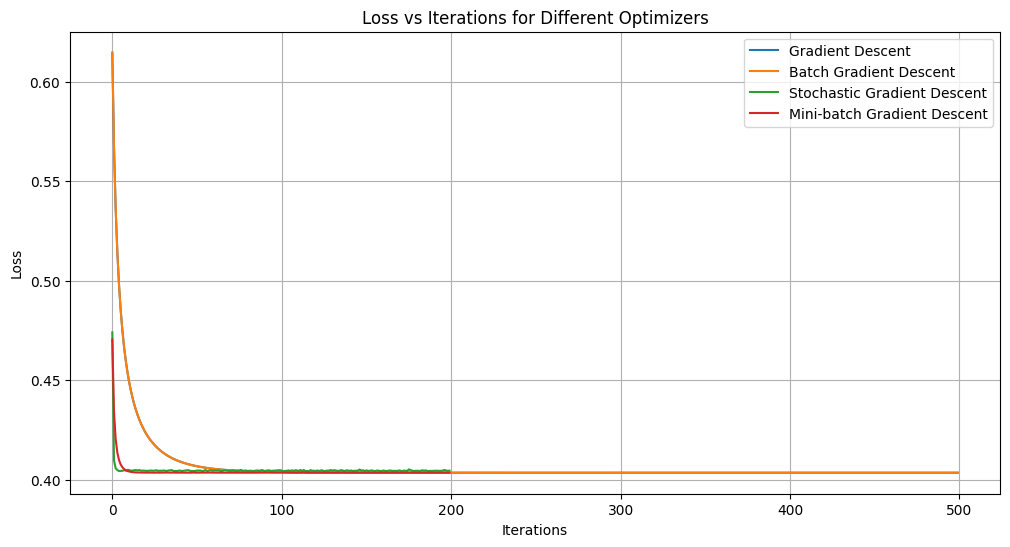


Optimizer Performance Comparison:
Optimizer                 Accuracy   Precision  Recall     F1 Score  
-----------------------------------------------------------------
Gradient Descent          0.8195     0.8348     0.7917     0.8127    
Batch Gradient Descent    0.8195     0.8348     0.7917     0.8127    
Stochastic Gradient Descent 0.8220     0.8378     0.7937     0.8152    
Mini-batch Gradient Descent 0.8215     0.8383     0.7917     0.8144    


In [ ]:
def run_experiment():
    """Run experiment comparing different optimizers"""
    # Load data
    X_train, X_test, y_train, y_test = load_data()

    # Define optimizers with their configurations
    optimizers = {
        'Gradient Descent': {
            'method': 'gradient_descent',
            'params': {'learning_rate': 0.5, 'epochs': 500}
        },
        'Batch Gradient Descent': {
            'method': 'batch_gradient_descent',
            'params': {'learning_rate': 0.5, 'epochs': 500}
        },
        'Stochastic Gradient Descent': {
            'method': 'stochastic_gradient_descent',
            'params': {'learning_rate': 0.002, 'epochs': 200}
        },
        'Mini-batch Gradient Descent': {
            'method': 'mini_batch_gradient_descent',
            'params': {'learning_rate': 0.02, 'epochs': 200, 'batch_size': 40}
        }
    }

    results = {}
    loss_history = {}

    # Train and evaluate models
    for name, config in optimizers.items():
        print(f"\n{'-'*50}")
        print(f"Training with {name}")
        print(f"{'-'*50}")

        model = LinearRegression()
        method = getattr(model, config['method'])
        method(X_train, y_train, **config['params'])

        # Store loss history
        loss_history[name] = model.losses

        # Evaluate model
        metrics = evaluate_model(model, X_test, y_test)
        results[name] = metrics

        # Print results
        print(f"\nResults for {name}:")
        print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1 Score: {metrics['f1_score']:.4f}")

    # Plot loss curves
    plt.figure(figsize=(12, 6))
    for name, losses in loss_history.items():
        plt.plot(losses, label=name)

    plt.title('Loss vs Iterations for Different Optimizers')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compare metrics in a table format
    print("\nOptimizer Performance Comparison:")
    print(f"{'Optimizer':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")
    print("-" * 65)

    for name, metrics in results.items():
        print(f"{name:<25} {metrics['accuracy']:<10.4f} {metrics['precision']:<10.4f} {metrics['recall']:<10.4f} {metrics['f1_score']:<10.4f}")

if __name__ == "__main__":
    run_experiment()